In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def momentum(prices, window):
    momentum_indicator = (prices['close'] / prices['close'].shift(window))-1
    return momentum_indicator

def SMA(prices, window):
    SMA_indicator = (prices['close'] / prices['close'].rolling(window).mean())-1
    return SMA_indicator
    
def inBBands(prices):
    inBB = []
    inBB.append(0)
    direction = 0   
    for i in range(1,len(prices)):
        if(prices['close'][i] > prices['boll_ub'][i] and prices['close'][i-1] < prices['boll_ub'][i-1]):
            direction = 0
        if(prices['close'][i] < prices['boll_ub'][i] and prices['close'][i-1] > prices['boll_ub'][i-1]):
            direction = -1
        if(prices['close'][i] > prices['boll_lb'][i] and prices['close'][i-1] < prices['boll_lb'][i-1]):
            direction = 1
        if(prices['close'][i] < prices['boll_lb'][i] and prices['close'][i-1] > prices['boll_lb'][i-1]):
            direction = 0
        inBB.append(direction)
    inBB = np.convolve(inBB, np.repeat(1.0, 3)/3, 'same')
    return inBB

In [3]:
aapl = pd.read_csv('/home/simone/Desktop/NLFF/indexes/indexesAAPL.csv')

In [4]:
m = aapl['close'].min()
M = aapl['close'].max()
norm = 2*(aapl['close'] - m)/(M-m)-1
bb_ub = 2*(aapl['boll_ub'] - m)/(M-m)-1
bb_lb = 2*(aapl['boll_lb'] - m)/(M-m)-1

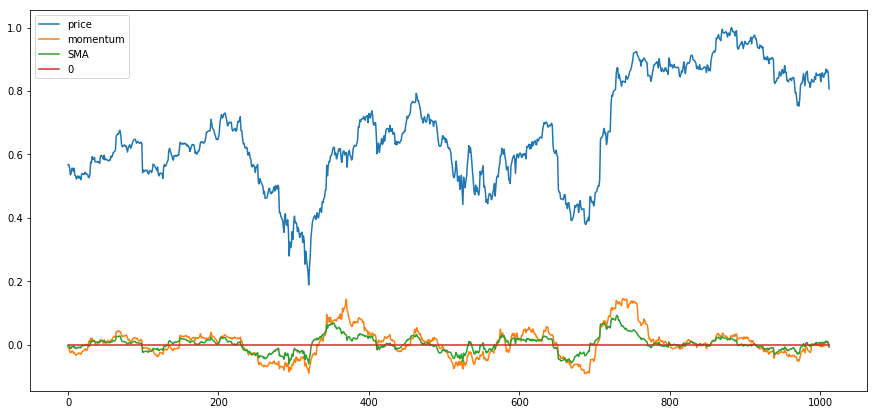

In [5]:
plt.figure(figsize=(15,7))
plt.plot(range(0,1013),norm[5000:], label='price')
plt.plot(range(0,1013),momentum(aapl, 50)[5000:], label='momentum')
plt.plot(range(0,1013),SMA(aapl, 50)[5000:], label='SMA')
plt.plot(range(0,1013),np.zeros(1013), label='0')


plt.legend()
plt.show()

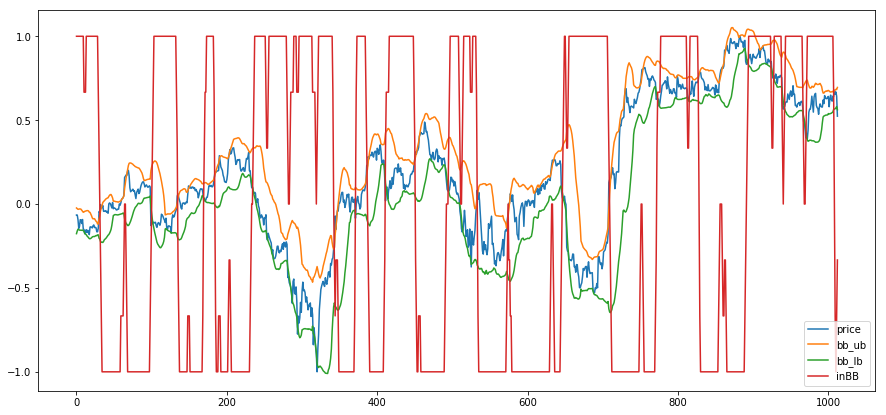

In [6]:
m = aapl['close'][5000:].min()
M = aapl['close'][5000:].max()
norm = 2*(aapl['close'][5000:] - m)/(M-m)-1
bb_ub = 2*(aapl['boll_ub'][5000:] - m)/(M-m)-1
bb_lb = 2*(aapl['boll_lb'][5000:] - m)/(M-m)-1

plt.figure(figsize=(15,7))
plt.plot(range(0,1013),norm, label='price')
plt.plot(range(0,1013),bb_ub, label='bb_ub')
plt.plot(range(0,1013),bb_lb, label='bb_lb')
plt.plot(inBBands(aapl)[5000:], label='inBB')

plt.legend()
plt.show()

In [ ]:
#plt.plot(inBBands(aapl)[5000:], label='inBB')
len(inBBands(aapl)[5000:])